## XÁC SUẤT TRONG KHOA HỌC DỮ LIỆU IUH 2024

### Lab 5. Vấn đề simulation (ngày 04/03)

Tính xác suất có điều kiện bằng phương pháp mô phỏng: Để tính gần đúng xác suất có điều kiện của một biến cố $B$ khi biết biến cố $A$ đã xảy ra trong thí nghiệm $T$, ta có thể dùng phương pháp thống kê như sau:

> Thực hiện lặp lại $N$ lần (độc lập) thí nghiệm $T$, đếm số lần biến cố $A$ xảy ra, $m$, và trong các lần $A$ xảy ra thì đếm số lần $B$ cũng xảy ra, $p$. Khi đó $f_{B|A} = \frac{p}{m}$ được gọi là tần suất của $B$ trên $A$.

> Khi $N$ đủ lớn, ta có $f_{B|A} \approx P(B|A)$.

> Việc thực hiện lặp lại nhiều lần thí nghiệm $T$ có thể được mô phỏng (simulate) trên máy, chẳng hạn bằng Python (dùng thư viện tạo số ngẫu nhiên như [random](https://docs.python.org/3/library/random.html)).

### Các bài toán cơ bản

In [1]:
from fractions import Fraction as F
import matplotlib.pyplot as plt
import numpy as np
import random

**Bài toán 1.** Tung một cặp xúc sắc hai lần, liệt kê các kết quả thuận lợi cho biến cố "tổng 2 mặt lớn hơn 9".

In [2]:
A = []
for i in range(1,7):
    for j in range(1, 7):
        if (i + j > 9):
            A.append((i, j))
print(f"A = {A} => A = {len(A)}")

A = [(4, 6), (5, 5), (5, 6), (6, 4), (6, 5), (6, 6)] => A = 6


**Bài toán 2.** Bốc ngẫu nhiên 10 viên bi trong hộp gồm 8 bi Đỏ và 12 bi Đen. Tính xác suất bốc được đúng 5 bi đỏ trong các trường hợp:
* (a) Bốc có hoàn lại (đáp số đúng là $\frac{C_{10}^{5}\times8^5\times12^5}{20^{10}} \approx 0.200658$).

In [3]:
def relative_frequency(N, event, outcome=None):
    if outcome:
        m = sum(event(outcome()) for _ in range(N))
    else:
        m = sum(event() for _ in range(N))
    return m/N

In [4]:
def take_marbles():
    return [random.randint(0, 19) for _ in range(10)]

def only_5(outcome):
    red = range(0,8)
    return len([x for x in outcome if x in red]) == 5

N = 10000
relative_frequency(N, only_5, take_marbles)

0.1942

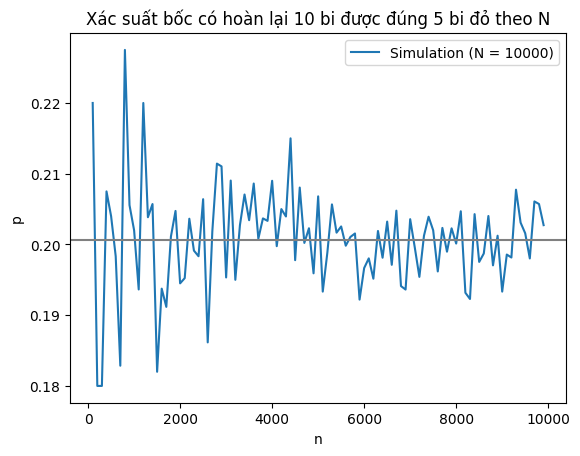

In [5]:
N_list = [100*i for i in range(1, 100)]
P1_list = [relative_frequency(n, only_5, take_marbles) for n in N_list]
plt.plot(N_list, P1_list, label=f"Simulation (N = {N})")
plt.legend()
plt.axhline(y=(252*8**5*12**5/20**10), color='gray', linestyle='-')
plt.xlabel("n")
plt.ylabel("p")
plt.title("Xác suất bốc có hoàn lại 10 bi được đúng 5 bi đỏ theo N")
plt.show()

* (b) Bốc không hoàn lại (đáp số đúng là $\frac{C_{10}^{5}\times P_{8}^{5}\times P_{12}^{5}}{P_{20}^{10}} = \frac{1008}{4199} \approx 0.240057$).

In [6]:
def take_marbles_away():
    return random.sample(range(20), 10)

N = 10000
relative_frequency(N, only_5, take_marbles_away)

0.2444

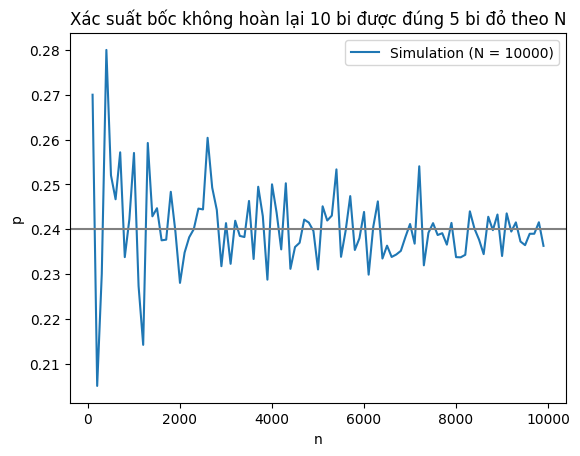

In [7]:
N_list = [100*i for i in range(1, 100)]
P2_list = [relative_frequency(n, only_5, take_marbles_away) for n in N_list]
plt.plot(N_list, P2_list, label=f"Simulation (N = {N})")
plt.legend()
plt.axhline(y=(1008/4199), color='gray', linestyle='-')
plt.xlabel("n")
plt.ylabel("p")
plt.title("Xác suất bốc không hoàn lại 10 bi được đúng 5 bi đỏ theo N")
plt.show()

**Bài toán 3.** Tung một con xúc sắc đồng chất 60 lần, tính xác suất tổng số mặt thu được là không lớn hơn 200.

In [8]:
def simulate_xucsac(N):
    m = 0
    for _ in range(N):
        s = sum(random.randint(1,6) for _ in range(60))
        if (s <= 200):
            m = m + 1
    return m/N

simulate_xucsac(50000) #đáp số theo công thức xấp xỉ là 0.2248

0.23284

**Bài toán 4.** Bỏ đi ngẫu nhiên 2 lá bài trong bộ bài 52 lá. Chia đều ngẫu nhiên 50 lá còn lại cho 5 người. Tính xác suất có người nào đó nhận được 4 lá Ách (xác suất đúng là $0.003878$).

In [9]:
#Cách 1

def hop_bai():
    loai_bai = ["A", "2", "3", "4", "5", "6", "7", "8", "9", "10", "J", "Q", "K"]
    return loai_bai + loai_bai + loai_bai + loai_bai

def chia_bai():
    return np.array_split(random.sample(hop_bai(), 50), 5)

def xacsuat_4ach(N):
    m = 0;
    for _ in range(N):
        for mot_nguoi in chia_bai():
            if(np.count_nonzero(mot_nguoi == "A") == 4):
                m=m+1
    return m/N
print (xacsuat_4ach(100000))

0.00422


In [10]:
#Cách 2.

#Coi 4 lá Ách là 0, 1, 2, 3

def create_sample():
    return [i for i in range(52)]

def simulate():
    cards = random.sample(create_sample(), 50)
    return any(all(x in cards[10 * i : 10 * (i + 1)] for x in [0, 1, 2, 3]) for i in range(5))

def calculate(N, X):
    m = sum(X() for _ in range(N))
    return m / N

calculate(100000, simulate)

0.00347

**Bài toán 5.** Bài toán ngày sinh nhật

In [11]:
def birthday(k):
    return [random . randint (1, 365) for _ in range (k)]

def relative_frequency(k, N):
    m = sum(len(set(birthday(k))) < k for _ in range (N))
    return m/N

relative_frequency(50 , 1000)

0.965

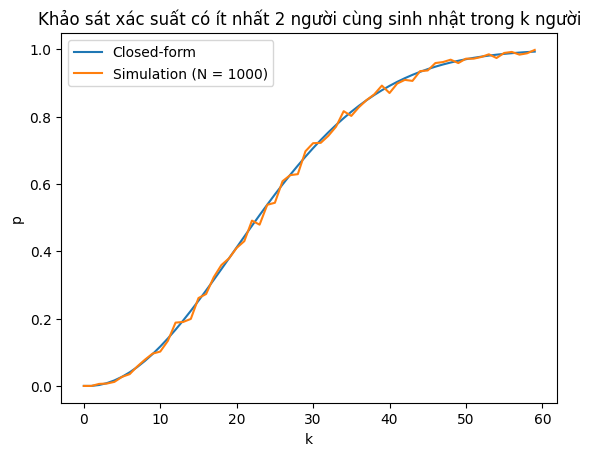

In [12]:
def perm(n, k):
    p = 1
    for i in range(n - k + 1, n + 1):
        p *= i
    return p

N = 1000
k_list = range(0, 60)
P_list = [1 - perm(365, k)/365**k for k in k_list]
F_list = [relative_frequency(k, N) for k in k_list]

plt.plot(k_list, P_list)
plt.plot(k_list, F_list)
plt.legend(["Closed-form", "Simulation (N = {})".format(N)])
plt.xlabel("k")
plt.ylabel("p")
plt.title("Khảo sát xác suất có ít nhất 2 người cùng sinh nhật trong k người")
plt.show()

> Các bài toán nâng cao

**Bài toán 6.** Bài toán ném phi tiêu

In [13]:
import math

# Cài đặt hàm ném phi tiêu này sai (không ngẫu nhiên theo bán kính)
def nem_phi_tieu_1(): # hinh tron C co ban kinh 1
    r = random.random()
    phi = random.uniform(0, 360)

    return (r*math.cos(phi), r*math.sin(phi))

# Cài đặt hàm ném phi tiêu này đúng (ngẫu nhiên theo điểm trong hình tròn C)
def nem_phi_tieu(): # hinh tron C co ban kinh 1
    while True:
        x, y = 2*random.random() - 1, 2*random.random() - 1
        r = math.sqrt(x**2 + y**2)
        if r <= 1:
            return (x, y)

def tan_suat_trung(t, N): # hinh tron D co ban kinh t
    return sum(math.sqrt(x**2 + y**2) <= t for x, y in (nem_phi_tieu() for _ in range(N))) / N

tan_suat_trung(1/2, 100_000)

0.25114

**Bài toán 7.** Monty Hall

In [14]:
def Monty_Hall(doors={"#1", "#2", "#3"}):
    car_door = random.choice(list(doors))
    choice_door = random.choice(list(doors))
    open_door = random.choice(list(doors - {choice_door, car_door}))
    op_door = random.choice(list(doors - {choice_door, open_door}))

    return car_door == choice_door, car_door == op_door

N = 10000
results = [Monty_Hall() for _ in range(N)]

stay_freq = sum([v for v, _ in results])/N
switch_freq = sum([v for _, v in results])/N

print(stay_freq, switch_freq)

0.3329 0.6671


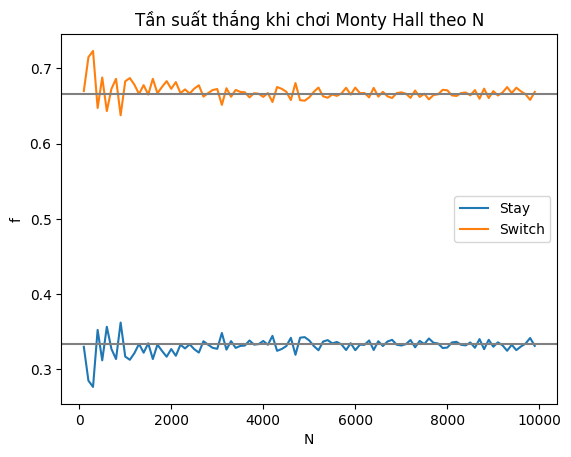

In [15]:
N_list = [100*i for i in range(1, 100)]
stay_list = [0 for _ in range(len(N_list))]
switch_list = [0 for _ in range(len(N_list))]

for i, N in enumerate(N_list):
    results = [Monty_Hall() for _ in range(N)]
    stay_list[i] = sum([v for v, _ in results])/N
    switch_list[i] = sum([v for _, v in results])/N

plt.plot(N_list, stay_list)
plt.plot(N_list, switch_list)
plt.legend(["Stay", "Switch"])
plt.axhline(y=1/3, color='gray', linestyle='-')
plt.axhline(y=2/3, color='gray', linestyle='-')
plt.xlabel("N")
plt.ylabel("f")
plt.title("Tần suất thắng khi chơi Monty Hall theo N")

plt.show()

### BT bổ sung.

### Bài 1.

Bốc ngẫu nhiên 8 viên bi trong hộp gồm $7$ bi đỏ và $8$ bi đen. Tính xác suất bốc được số bi đỏ nhiều hơn số bi đen trong các trường hợp: a) bốc có hoàn lại, b) bốc không hoàn lại.

In [16]:
#bốc có hoàn lại: hộp bi gồm các viên bi đánh số từ 1, 2, ..., 15
bido = range(1,8) # bi đỏ từ 1,2,...,7

N = 10000 #bốc N lần
M = 0 #đếm số lần thành công => đỏ > đen

for _ in range(0,N):
    do = 0
    den = 0
    for i in range(0,8):
        x = random.randint(1,16)
        if x in bido:
            do = do + 1
        else:
            den = den + 1
    if do > den:
        M = M+1
M / N

0.2401

In [17]:
#bốc không hoàn lại: hộp bi gồm các viên bi đánh số từ 1, 2, ..., 15
hopbi = range(1,16)

N = 10000
M = 0
for _ in range(0, N):
    do = 0
    den = 0
    cur = random.sample(hopbi, 8)
    for x in cur:
        if x in bido:
            do = do + 1
        else:
            den = den + 1
    if do > den:
        M = M + 1
M / N

0.2087

### Bài 2.
Bộ bài có 52 lá. Bốc ngẫu nhiên 13 lá, tính XS để bốc được tứ quý ách?

Tính bằng lý thuyết: KGM = 52C13, số TH thuận lợi: 48C9. Đáp số ~ 0.00264106.

Ta sẽ dùng simulate để kiểm chứng kết quả này.

In [18]:
#CÁCH 1
hop_bai = range(1,53)
ach = range(1,5)
N = 10000
M = 0
cur_list = []
for i in range(1,N+1):
    chia_bai = random.sample(hop_bai, 13)
    num = 0
    for x in chia_bai:
        if x in ach:
            num = num+1
    if num == 4:
        M = M+1
    cur_list.append(M/i)
M/N

0.0034

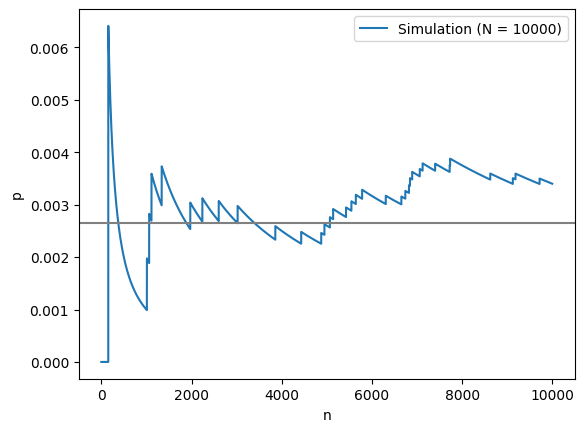

In [19]:
N_list = range(0,N)
plt.plot(N_list, cur_list, label=f"Simulation (N = {N})")
plt.legend()
plt.axhline(y=0.00264106, color='gray', linestyle='-')
plt.xlabel("n")
plt.ylabel("p")
plt.show()

In [20]:
#CÁCH 2
loai_bai = ["A", "2", "3", "4", "5", "6", "7", "8", "9", "10", "J", "Q", "K"]
hop_bai = loai_bai + loai_bai + loai_bai + loai_bai

N = 1000000
M = 0
for _ in range(0,N):
    chia_bai = np.array(random.sample(hop_bai, 13))
    if(np.count_nonzero(chia_bai == "A") == 4):
        M = M+1
M/N

0.002626

### Bài 3.

Một hộp bi gồm: sáu viên số 1, ba viên số 2, hai viên số 3 và một viên số 4. Xét trò chơi bốc bi từ hộp này: để chơi phải đóng 2đ cho nhà cái và bốc (ngẫu nhiên) được bi số i sẽ được nhà cái gửi i đồng (i = 1, 2, 3, 4).

* (a) Ta có nên chơi trò này không?

Gọi số viên số 1, 2, 3, 4 lần lượt là: $X_1, X_2, X_3, X_4$. Xác suất bốc trúng của 4 loại bi là:  
$P(X_1) = \frac{6}{12} = \frac{1}{2}\\
P(X_2) = \frac{3}{12} = \frac{1}{4}\\
P(X_3) = \frac{2}{12} = \frac{1}{6}\\
P(X_4) = \frac{1}{12}$  

Và số tiền chung cuộc (M) nếu bốc trúng bi 1, 2, 3, 4 lần lượt là: -1, 0, 1, 2

\begin{array}{ccc}
M & -1 & 0 & 1 & 2\\ \hline\
P(M) = P(X) & \frac{1}{2} & \frac{1}{4} & \frac{1}{6} & \frac{1}{12}
\end{array}

In [21]:
tien = [-1, -1, -1, -1, -1, -1, 0, 0, 0, 1, 1, 2]
def rutbi(n):
    birutduoc = []
    for i in range(0, n):
        bi = np.random.choice(tien, 1, replace=True)[0]
        birutduoc.append(bi)
    return birutduoc

s = rutbi(100000)
phanphoi = {i: s.count(i)/len(s) for i in sorted(set(s))}
phanphoi

{-1: 0.5003, 0: 0.2479, 1: 0.16888, 2: 0.08292}

Để xét xem nên chơi trò này hay không ta sẽ tính kì vọng tiền chung cuộc sau mỗi lần rút là:<br> $\mathrm{E}(X) = (-1).0.5 + \frac{1}{4}.0 + \frac{1}{6}.1 + \frac{1}{12}.2 = -\frac{1}{6}$<br>
Vậy theo như kì vọng thì ta không nên chơi trò này vì sẽ bị lỗ.

Ta mô phỏng trò chơi và giả sử có 100 đồng trong túi, đồng thời sẽ chơi trò này đến khi nào không còn tiền chơi hoặc chi cần lời được 10 đồng thì dừng. Ta sẽ chơi mô phỏng 5000 lần.

In [23]:
from tqdm import tqdm

hopbi = [1, 1, 1, 1, 1, 1, 2, 2, 2, 3, 3, 4]
def rutbi(balance):
    new_balance = balance
    for i in range(10000):
        if(new_balance < 2 or new_balance >= balance + 10):
            break
        new_balance = new_balance - 2
        bi = np.random.choice(hopbi, 1, replace=True)[0]
        new_balance = new_balance + bi
    #print(f'new_balance = {new_balance}')
    return new_balance

In [24]:
def play(n, balance):
    Loi = 0
    Lo = 0
    for i in tqdm(range(n)):
        if(rutbi(balance) >= balance + 10):
            Loi = Loi + 1
        else:
            Lo = Lo + 1
    print(f'Loi: {Loi}, Lo: {Lo}, Tỉ lệ lỗ:{float(Lo/n*100)} %')

In [25]:
play(500, 100)
play(500, 100)
play(500, 100)

100%|██████████| 500/500 [00:07<00:00, 70.29it/s]


Loi: 20, Lo: 480, Tỉ lệ lỗ:96.0 %


100%|██████████| 500/500 [00:06<00:00, 76.64it/s]


Loi: 19, Lo: 481, Tỉ lệ lỗ:96.2 %


100%|██████████| 500/500 [00:06<00:00, 74.43it/s]

Loi: 21, Lo: 479, Tỉ lệ lỗ:95.8 %


In [ ]:
#Cách khác: ta mô phỏng lại để tính kì vọng số tiền thay đổi sau mỗi lần rút như sau
tien = [-1, -1, -1, -1, -1, -1, 0, 0, 0, 1, 1, 2]
def KVTien(tien,n):
    tien_thay_doi = []
    for i in tqdm(range(0,n)):
        tien_thay_doi.append(np.random.choice(tien,size=1,replace=True))
    return np.mean(tien_thay_doi)

In [ ]:
KVTien(tien,100000)

100%|██████████| 100000/100000 [00:02<00:00, 40774.39it/s]


-0.16398

* (b) Giả sử nếu người chơi bốc được bi số 4 thì nhà cái cho chơi thêm lần nữa mà chỉ đóng 1đ, ta có nên chơi không?

Ta tính toán lý thuyết tương tự như trên và thấy vẫn không nên chơi do kỳ vọng vẫn âm.

Với đề c, ta làm tương tự nhưng mỗi lần bốc bi 4 thì biến `des` giảm tiền cho lần kế tiếp.

In [ ]:
hopbi = [1, 1, 1, 1, 1, 1, 2, 2, 2, 3, 3, 4]
def rutbi1(balance):
    new_balance = balance
    dec = False
    for i in range(0, 10000):
        if(new_balance < 2 or new_balance >= balance + 10):
            break
        if(dec==True):
            new_balance = new_balance - 1
            dec=False
        else:
            new_balance = new_balance - 2
        bi = np.random.choice(hopbi, 1, replace=True)[0]
        if(bi == 4):
            dec=True
        new_balance = new_balance + bi
    #print(f'new_balance = {new_balance}')
    return new_balance

In [ ]:
def play1(n, balance):
    Loi = 0
    Lo = 0
    for i in tqdm(range(n)):
        #print(i);
        if(rutbi1(balance) >= balance + 10):
            Loi = Loi + 1
        else:
            Lo = Lo + 1
    print(f'Loi: {Loi}, Lo: {Lo}, Tỉ lệ lỗ:{float(Lo/n*100)} %')

In [ ]:
play1(500, 100)
play1(500, 100)
play1(500, 100)

100%|██████████| 500/500 [00:10<00:00, 46.12it/s]


Loi: 154, Lo: 346, Tỉ lệ lỗ:69.19999999999999 %


100%|██████████| 500/500 [00:10<00:00, 49.75it/s]


Loi: 154, Lo: 346, Tỉ lệ lỗ:69.19999999999999 %


100%|██████████| 500/500 [00:09<00:00, 54.64it/s]

Loi: 159, Lo: 341, Tỉ lệ lỗ:68.2 %


Kết quả là tỉ lệ lỗ thấp hơn hẳn so với kết quả từ ý **b** nhưng vẫn là cao $\approx70\%$.

### Bài tập rèn luyện

**Bài 1.** Lấy ngẫu nhiên trên miền $(0;1)$ ra ba số thực $a,b,c.$ Tính xác suất để phương trình bậc hai $ax^2+bx+c=0$ có nghiệm thực.

Ta thực 1000000 lần phép thử, khi đó thì kết quả thu được sẽ xấp xỉ với xác suất cần tìm


In [ ]:
import numpy as np
N = 1000000
cnt = 0
for _ in range (N) :
  a = np.random.rand()
  b = np.random.rand()
  c = np.random.rand()
  delta = b * b - 4 * a * c
  if delta >= 0 :
    cnt +=1
print(cnt/N)


0.254823


**Bài 2.** Cho hộp bi có $5$ bi xanh, $6$ bi đỏ và $7$ bi vàng. Chọn ngẫu nhiên ra hai viên bi, tính xác suất để chúng khác màu.

- Tính tay

In [26]:
from scipy import special
import math
Not_ans = special.comb(5,2) + special.comb(6,2) + special.comb(7,2)
Omega = special.comb(18,2)
# print(Not_ans)
# print(Omega)
P_not_ans = Not_ans/Omega
P_ans = 1 - P_not_ans
P_ans

0.6993464052287581

- Code trâu

In [27]:
# N = 1000000
lst = [0] * 5 + [1] * 6 + [2] * 7
cnt = 0
_Omega = 0
import random
for _ in range(N) :
  x = random.randint(0,17)
  y = random.randint(0,17)
  if x == y :
    continue
  _Omega += 1
  if lst[x] != lst[y] :
    cnt+=1
print(cnt/_Omega)


0.6996870615022107


**Bài 3.** Chọn ngẫu nhiên $4$ lá bài từ bộ bài $52$ lá, tính xác suất để có $4$ lá đỏ.

- Tính tay

In [28]:
Ans = special.comb(26,4)
O = special.comb(52,4)
Ans/O

0.055222088835534214

- Code trâu

In [29]:
# N = 1000000
red_card = [int(x) for x in range(26)]
full_card = [int(x) for x in range(52)]
f = 0
for _ in range(N) :
  test = random.sample(full_card, 4)
  cnt = 0
  for x in test :
    if x in red_card :
      cnt += 1
  if cnt == 4 :
    f += 1
print(f/N)

0.055634


**Bài 4.** Chọn ngẫu nhiên $13$ lá bài từ bộ bài, tính xác suất để tới trắng, tức là có Tứ quý heo hoặc $6$ đôi (hai lá cùng màu).

In [ ]:
N = 1000000

hop_bai = []

for i in range(1,13) :
    hop_bai += [i,i,i,i]
O = 0
for _ in range (N) :
    test = random.sample(hop_bai, 13)

    cnt = 0
    is_valid = []
    for val in test :
        if test.count(val) >= 2 :
            

**Bài 5.** Chúng ta sẽ sử dụng mô phỏng để xác định liệu chúng ta có nên mua một vé số hay không. Giả sử bạn có cơ hội mua một vé số có cơ hội giành giải độc đắc là $\$$ 10,000. Vì có tổng cộng 1000 vé số, khả năng của bạn để giành chiến thắng là 1 trên 1000. Mỗi vé số có giá là $\$$10. Trước tiên, hãy sử dụng kiến thức về mô phỏng cơ bản của chúng ta để mô phỏng một lần rút thăm vé số.

In [ ]:
# Pre-defined constant variables
lottery_ticket_cost, num_tickets, grand_prize = 10, 1000, 10000

# Probability of winning
chance_of_winning = 1/____

# Simulate a single drawing of the lottery
gains = [-lottery_ticket_cost, grand_prize-lottery_ticket_cost]
probability = [1-____, ____]
outcome = np.random.choice(a=gains, size=1, p=____, replace=True)

print("Outcome of one drawing of the lottery is {}".format(outcome))
\end{lstlisting}

SyntaxError: unexpected character after line continuation character (<ipython-input-31-59d28037c1c4>, line 13)

Trong bài tập trước đó, chúng ta đã mô phỏng quá trình rút thăm vé số một lần. Trong bài tập này, chúng ta hoàn thành quá trình mô phỏng bằng cách lặp lại quá trình này nhiều lần. \medskip

Việc lặp lại quá trình mang lại cho chúng ta nhiều kết quả. Chúng ta có thể tưởng tượng rằng đây là nhiều "vũ trụ" khác nhau trong đó cùng một quá trình rút thăm vé số xảy ra. Sau đó, chúng ta có thể xác định giá trị trung bình của các phần thưởng trên tất cả các "vũ trụ" này. Nếu giá trị trung bình của phần thưởng lớn hơn số tiền chúng ta trả để mua vé, thì có ý nghĩa khi mua vé; ngược lại, chúng ta có thể không muốn mua vé. Điều này thường được sử dụng trong việc đánh giá đầu tư kinh doanh bằng mô phỏng. Sau khi hoàn thành bài tập này, ta sẽ có các công cụ cơ bản cần thiết để sử dụng mô phỏng để đưa ra quyết định.

In [ ]:
# Initialize size and simulate outcome
lottery_ticket_cost, num_tickets, grand_prize = 10, 1000, 10000
chance_of_winning = 1/num_tickets
size = ____
payoffs = ____
probs = ____

outcomes = np.random.choice(a=____, size=size, p=____, replace=True)

# Mean of outcomes.
answer = ____
print("Average payoff from {} simulations = {}".format(size, answer))

Mô phỏng cho phép chúng ta đặt những câu hỏi sâu sắc hơn, nó có thể không có một giải pháp đơn giản. Thay vì giải một công thức toán học phức tạp, chúng ta trực tiếp nhận được nhiều kết quả mẫu. Chúng ta có thể thực hiện các thí nghiệm bằng cách sửa đổi các đầu vào và nghiên cứu cách những thay đổi đó ảnh hưởng đến hệ thống. Ví dụ, sau khi chúng ta có một mô hình khá hợp lý về các biểu hiện thời tiết toàn cầu, chúng ta có thể đánh giá tác động của việc tăng lượng khí nhà kính. Trong ví dụ về vé số, chúng ta có thể muốn biết giá vé cần phải đắt đỏ ra sao để việc mua vé không còn ý nghĩa nữa. Để hiểu điều này, ta cần sửa đổi giá vé để xem khi nào giá trị kỳ vọng trở nên âm.

In [ ]:
# Initialize simulations and cost of ticket
sims, lottery_ticket_cost = ____, ____

# Use a while loop to increment `lottery_ticket_cost` till average value of outcomes falls below zero
while 1:
    outcomes = np.random.choice([-lottery_ticket_cost, grand_prize-lottery_ticket_cost],
                 size=sims, p=[1-chance_of_winning, chance_of_winning], replace=True)
    if outcomes.mean() < 0:
        ____
    else:
        ____ += 1
answer = lottery_ticket_cost - 1

print("The highest price at which it makes sense to buy the ticket is {}".format(answer))